In [1]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv('../dataset/movies.csv')
df.dropna(subset=['writers', 'genre', 'directors', 'production_region', 'year', 'runtimeMinutes', 'averageRating'], inplace=True)
df.drop('endYear', axis=1, inplace=True)
df.shape

(3112, 22)

In [60]:
df = df[df.genre.apply(lambda x: len(x.split(',')) == 1)]

In [61]:
from pathlib import Path
import numpy as np

def read_embeddings(embedding_file: str):
    data = Path(embedding_file).read_text()
    lines = data.split('\n')
    filenames = []
    embeddings = []
    for line in lines:
        line_data = line.split(' ')
        if len(line_data) >= 2:
            filenames.append(line_data[0])
            embeddings.append(list(map(float, line_data[1:])))
    return np.asarray(filenames), np.asarray(embeddings)

In [62]:
mean_filenames, embeddings_mean = read_embeddings('../dataset/embeddings_mean.txt')
max_filenames, embeddings_max = read_embeddings('../dataset/embeddings_max.txt')
min_filenames, embeddings_min = read_embeddings('../dataset/embeddings_min.txt')

bert_mean_filenames, bert_mean = read_embeddings('../dataset/embeddings_bert_mean.txt')
bert_max_filenames, bert_max = read_embeddings('../dataset/embeddings_bert_max.txt')
bert_min_filenames, bert_min = read_embeddings('../dataset/embeddings_bert_min.txt')

bert_headtail_filenames, bert_headtail = read_embeddings('../dataset/embeddings_bert_headtail.txt')

In [63]:
df = df[df['filename'].isin(mean_filenames)].copy()

In [64]:
mean_embeddings = []
max_embeddings = []
min_embeddings = []

mean_bert = []
max_bert = []
min_bert = []
ht_bert = []
for index, row in df.iterrows():
    mean_embeddings.append(embeddings_mean[np.where(mean_filenames == row.filename)].ravel())
    max_embeddings.append(embeddings_max[np.where(max_filenames == row.filename)].ravel())
    min_embeddings.append(embeddings_min[np.where(min_filenames == row.filename)].ravel())
    
df['fasttext_mean'] = mean_embeddings
df['fasttext_max'] = max_embeddings
df['fasttext_min'] = min_embeddings


mean_embeddings = np.asarray(mean_embeddings)
max_embeddings = np.asarray(max_embeddings)
min_embeddings = np.asarray(min_embeddings)




del embeddings_mean, embeddings_max, embeddings_min

In [65]:
df.head()

,Unnamed: 0,Unnamed: 0.1,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,...,isAdult,startYear,runtimeMinutes,averageRating,numVotes,mean_sentence_length,type_token_ratio,fasttext_mean,fasttext_max,fasttext_min
1,1,2784,4732286.xml,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75.0,...,0.0,1966.0,75.0,5.8,36.0,5.990902,0.293297,"[-0.08849932, 0.13341562, -0.16020295, -0.2384...","[0.57557, 1.011, 0.53746, 0.57593, 0.96204, 1....","[-0.87448, -0.52082, -0.98753, -1.327, -0.7311..."
2,2,3085,6122081.xml,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78.0,...,0.0,1967.0,78.0,7.0,34.0,5.822102,0.326870,"[-0.07498731, 0.13234918, -0.14840715, -0.2293...","[0.606, 1.0807, 0.67317, 0.43597, 0.9357, 0.89...","[-1.017, -0.52082, -0.91285, -1.2295, -0.44328..."
4,4,6281,5618549.xml,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979.0,Japanese,untokenisiert,96.0,...,0.0,1979.0,96.0,5.7,44.0,5.902730,0.354112,"[-0.07911543, 0.15853323, -0.1507321, -0.24809...","[0.66192, 1.1468, 0.57584, 0.62057, 1.0326, 1....","[-0.87448, -0.52082, -0.97477, -1.173, -0.5657..."
8,8,18151,5116660.xml,Um 5 Uhr früh japanischer Zeit wurden der Präs...,tt1929181,Drama,2003.0,Japanese,untokenisiert,63.0,...,0.0,2003.0,63.0,5.6,68.0,5.448617,0.336123,"[-0.053122275, 0.1306332, -0.15958834, -0.2450...","[0.57557, 1.011, 0.48679, 0.58651, 0.94419, 0....","[-0.88422, -0.52082, -1.0321, -0.96903, -0.490..."
9,9,18281,6235492.xml,Warum haben wir solch ein intensives Gefühl fü...,tt3163492,Romance,2003.0,Japanese,untokenisiert,63.0,...,0.0,2003.0,63.0,5.1,17.0,6.727758,0.306358,"[-0.07119269, 0.14982955, -0.15001182, -0.2368...","[0.57557, 1.0562, 0.41658, 0.72399, 1.1319, 0....","[-0.87448, -0.52082, -0.81771, -1.0776, -0.457..."


In [66]:
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder


genre_binarizer = MultiLabelBinarizer()
genre_bin = genre_binarizer.fit_transform(df.genre.str.split(','))

prodregion_binarizer = MultiLabelBinarizer()
prodregion_bin = prodregion_binarizer.fit_transform(df.production_region.str.split(','))

writer_binarizer = MultiLabelBinarizer()
writer_bin = writer_binarizer.fit_transform(df.writers.str.split(','))

directors_binarizer = MultiLabelBinarizer()
directors_bin = directors_binarizer.fit_transform(df.directors.str.split(','))

year_encoder = OneHotEncoder(sparse=False)
year_enc = year_encoder.fit_transform(df.year.values.reshape((-1, 1)))

In [67]:
from sklearn.preprocessing import StandardScaler

runtime_scaler = StandardScaler()
runtime_scaled = runtime_scaler.fit_transform(df.runtimeMinutes.values.reshape((-1, 1)))

rating_scaler = StandardScaler()
rating_scaled = rating_scaler.fit_transform(df.averageRating.values.reshape((-1, 1)))



In [68]:
additional_feat = np.hstack([
    #genre_bin,
    prodregion_bin,
    writer_bin,
    directors_bin,
    year_enc,
    runtime_scaled,
    rating_scaled,
    df.type_token_ratio.to_numpy().reshape(-1,1),
    df.mean_sentence_length.to_numpy().reshape(-1,1)
])

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words

tfidf = TfidfVectorizer(max_features=10000, stop_words=get_stop_words('de'))

text_feat = tfidf.fit_transform(df.text)

In [70]:
concat= np.hstack([
    text_feat.todense(),
    additional_feat,
    mean_embeddings,
    max_embeddings,
    min_embeddings
])
concat.shape

(761, 13224)

/home/lennart/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



(array([239., 157., 136., 188.,  41.]),
 array([0, 1, 2, 3, 4, 5], dtype=int32),
 <a list of 5 Patch objects>)

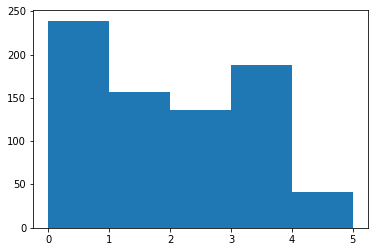

In [71]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture

clu = KMeans(n_clusters=6, n_jobs=-1)
labels = clu.fit_predict(concat)
n_labels = np.unique(labels)

plt.hist(labels, bins=n_labels)

In [72]:
text_data = [
    f'{row.originalTitle}|{row.genre}|{row.production_region}|'
    f'{row.runtimeMinutes}|{row.writers}|{row.directors}|'
    f'{row.year}'
    for index, row in df.iterrows()
]

In [73]:
from umap import UMAP

Xr_u = UMAP(n_components=2).fit_transform(concat)

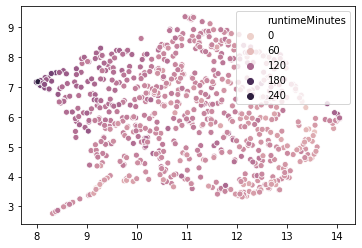

In [74]:
import seaborn as sns
sns.scatterplot(x=Xr_u[:, 0], y=Xr_u[:, 1], hue=df.runtimeMinutes)

In [75]:
import plotly.graph_objects as go
import plotly.express as px


fig = go.Figure(data=go.Scatter(x=Xr_u[:, 0],
                                y=Xr_u[:, 1],
                                mode='markers',
                                marker_color=labels,
                                text=text_data))


fig.show()

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xr_pca = pca.fit_transform(concat)

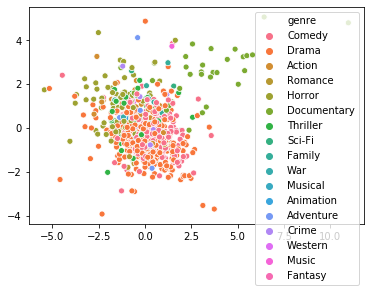

In [78]:
import seaborn as sns
sns.scatterplot(x=Xr_pca[:, 0], y=Xr_pca[:,1], hue=df.genre)

In [91]:
import plotly.graph_objects as go
import plotly.express as px


fig = go.Figure(data=go.Scatter(x=Xr_pca[:, 0],
                                y=Xr_pca[:, 1],
                                mode='markers',
                                marker=dict(
                                    color=df.genre, #set color equal to a variable
                                    colorscale='Viridis', # one of plotly colorscales
                                    showscale=True
                                ),
                                text=text_data))


fig.show()

ValueError: 
    Invalid element(s) received for the 'color' property of scatter.marker
        Invalid elements include: ['Comedy', 'Drama', 'Action', 'Drama', 'Romance', 'Horror', 'Drama', 'Drama', 'Documentary', 'Thriller']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to scatter.marker.colorscale
      - A list or array of any of the above

In [ ]:
single_genres = [entry[0] if len(entry) == 1 else "Multi" for entry in df.genre.str.split(',')]

In [ ]:
single_genres

In [ ]:
from collections import Counter

Counter(list(filter(lambda x: x != 'Multi', single_genres)))

In [ ]:
import plotly.express as px
fig = px.
fig